

---



# **FREEZING-OF-GAIT**


---


Paulo Bastos & Raquel Barbosa,       August 6th 2022
---



---



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import math
import scipy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---



**Import Data at the time of clinical evaluation**



---





In [ ]:
FOG_Stim_conditions = pd.read_csv('FOG_Stim_conditions.csv', sep = ';')

In [ ]:
FOG_Stim_conditions.dtypes

patient               int64
UPDRS_III             int64
Item_3_10             int64
Item_3_11             int64
Item_3_12             int64
SWS_time_s          float64
SWS_N_FOG_Events    float64
HY                    int64
AIMS                  int64
condition            object
dtype: object

In [ ]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          5
SWS_N_FOG_Events    5
HY                  0
AIMS                0
condition           0
dtype: int64

In [ ]:
FOG_Stim_conditions.nunique()

patient             15
UPDRS_III           36
Item_3_10            4
Item_3_11            5
Item_3_12            5
SWS_time_s          63
SWS_N_FOG_Events    24
HY                   4
AIMS                17
condition            5
dtype: int64

In [ ]:
print(FOG_Stim_conditions)

    patient  UPDRS_III  Item_3_10  Item_3_11  Item_3_12  SWS_time_s  \
0      1684         55          2          2          0        49.0   
1    486931         79          2          3          0        75.0   
2    600294         65          3          4          1       439.0   
3   1093025         75          4          4          4       258.0   
4   1102776         59          2          3          3       111.0   
..      ...        ...        ...        ...        ...         ...   
70  2126683         29          3          4          0       221.0   
71  2162586         62          2          4          0        58.0   
72  2223671         44          2          4          0       166.0   
73  2295512         29          2          2          0        55.0   
74  2561251         39          2          2          0        17.0   

    SWS_N_FOG_Events  HY  AIMS            condition  
0                2.0   2     0     MED_OFF_STIM_OFF  
1                4.0   2     0     MED_

In [ ]:
FOG_Stim_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient           75 non-null     int64  
 1   UPDRS_III         75 non-null     int64  
 2   Item_3_10         75 non-null     int64  
 3   Item_3_11         75 non-null     int64  
 4   Item_3_12         75 non-null     int64  
 5   SWS_time_s        70 non-null     float64
 6   SWS_N_FOG_Events  70 non-null     float64
 7   HY                75 non-null     int64  
 8   AIMS              75 non-null     int64  
 9   condition         75 non-null     object 
dtypes: float64(2), int64(7), object(1)
memory usage: 6.0+ KB


In [ ]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          5
SWS_N_FOG_Events    5
HY                  0
AIMS                0
condition           0
dtype: int64



---


**There are 10 missing values [*out of 600, 75 entries x 8 vars]**

---



In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,60.866667,9.796987,41.0,56.0,60.0,65.5,79.0
MED_OFF_STIM_ON,15.0,44.333333,7.752112,28.0,41.0,46.0,49.0,54.0
MED_ON_STIM_OFF,15.0,48.200000,10.618044,34.0,38.5,50.0,53.5,71.0
MED_ON_STIM_ON,15.0,38.000000,8.928286,21.0,34.0,41.0,45.0,48.0
MED_ON_STIM_ON_60Hz,15.0,40.600000,10.259490,21.0,35.5,39.0,46.0,62.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,2.533333,0.639940,2.0,2.0,2.0,3.0,4.0
MED_OFF_STIM_ON,15.0,2.266667,0.457738,2.0,2.0,2.0,2.5,3.0
MED_ON_STIM_OFF,15.0,2.533333,0.743223,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,15.0,2.333333,0.617213,2.0,2.0,2.0,2.5,4.0
MED_ON_STIM_ON_60Hz,15.0,2.000000,0.377964,1.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,3.333333,0.816497,2.0,3.0,4.0,4.0,4.0
MED_OFF_STIM_ON,15.0,2.266667,1.533747,0.0,1.0,2.0,4.0,4.0
MED_ON_STIM_OFF,15.0,3.066667,1.162919,1.0,2.0,4.0,4.0,4.0
MED_ON_STIM_ON,15.0,2.533333,1.125463,1.0,2.0,2.0,3.5,4.0
MED_ON_STIM_ON_60Hz,15.0,2.200000,1.373213,0.0,1.5,2.0,3.5,4.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,1.733333,1.486447,0.0,0.5,1.0,3.0,4.0
MED_OFF_STIM_ON,15.0,1.133333,1.552264,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_OFF,15.0,1.200000,1.656157,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON,15.0,1.066667,1.624221,0.0,0.0,0.0,2.5,4.0
MED_ON_STIM_ON_60Hz,15.0,0.533333,0.990430,0.0,0.0,0.0,0.5,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,216.866667,191.388485,30.0,62.00,125.0,311.00,599.0
MED_OFF_STIM_ON,15.0,124.400000,137.844529,19.0,39.00,52.0,168.00,478.0
MED_ON_STIM_OFF,13.0,128.076923,97.389648,24.0,37.00,100.0,180.00,321.0
MED_ON_STIM_ON,13.0,67.230769,44.309807,22.0,34.00,62.0,90.00,184.0
MED_ON_STIM_ON_60Hz,14.0,72.785714,57.948490,17.0,41.75,57.5,64.75,221.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,16.866667,16.457159,2.0,4.0,12.0,20.50,55.0
MED_OFF_STIM_ON,15.0,9.666667,12.821114,0.0,1.0,2.0,15.50,36.0
MED_ON_STIM_OFF,13.0,9.615385,8.352030,1.0,2.0,4.0,19.00,21.0
MED_ON_STIM_ON,13.0,4.230769,4.206222,1.0,2.0,2.0,5.00,14.0
MED_ON_STIM_ON_60Hz,14.0,6.142857,8.769327,0.0,1.0,3.0,6.25,31.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["HY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,2.800000,1.014185,2.0,2.0,2.0,3.5,5.0
MED_OFF_STIM_ON,15.0,2.533333,0.833809,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_OFF,15.0,2.666667,1.112697,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON,15.0,2.466667,0.915475,2.0,2.0,2.0,2.5,5.0
MED_ON_STIM_ON_60Hz,15.0,2.133333,0.351866,2.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["AIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,4.666667,8.234654,0.0,0.0,0.0,6.0,32.0
MED_OFF_STIM_ON,15.0,3.866667,7.308182,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,15.0,9.333333,10.019030,0.0,0.0,8.0,15.0,26.0
MED_ON_STIM_ON,15.0,9.466667,12.105882,0.0,1.0,4.0,14.0,44.0
MED_ON_STIM_ON_60Hz,15.0,12.000000,13.352367,0.0,1.0,6.0,19.0,42.0


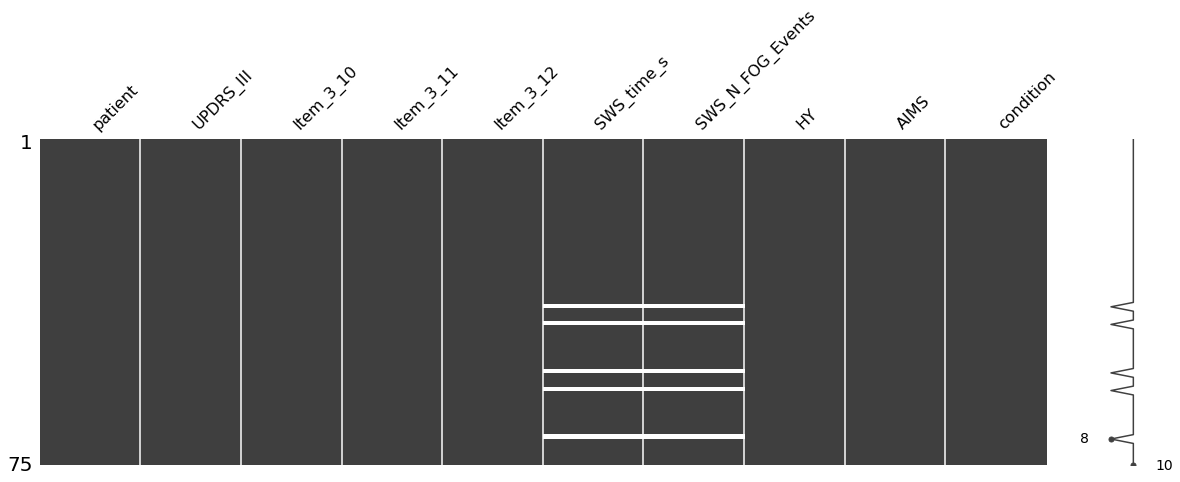

In [ ]:
mno.matrix(FOG_Stim_conditions,figsize = (20,6))



---


**Dealing with the NAs by Complete Case Analysis / List wise deletion is not feasible given the number of patients.**

**Inputing a Measure of Central Tendency would significantly skew the data.**

**The best compromise is to predicte the missing values based on the entire dataset.**


---



In [ ]:
# Remove patient index

patid_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,0:1]

In [ ]:
# Remove condition label

condition_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,9:10]

In [ ]:
# Select remianing, numeric variables

FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,1:9]

In [ ]:
 # Select colunms to predicted / use as predictors
  
missing_columns = ["UPDRS_III","Item_3_10", "Item_3_11", "Item_3_12", "SWS_time_s", "SWS_N_FOG_Events", "HY", "AIMS"]

In [ ]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
# Rename new variables
for feature in missing_columns:
    FOG_Stim_conditions[feature + '_imp'] = FOG_Stim_conditions[feature]
    FOG_Stim_conditions = random_imputation(FOG_Stim_conditions, feature)

In [ ]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = FOG_Stim_conditions[feature + "_imp"]
    parameters = list(set(FOG_Stim_conditions.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = FOG_Stim_conditions[parameters], y = FOG_Stim_conditions[feature + '_imp'])
    
    deter_data.loc[FOG_Stim_conditions[feature].isnull(), "Det" + feature] = model.predict(FOG_Stim_conditions[parameters])[FOG_Stim_conditions[feature].isnull()]

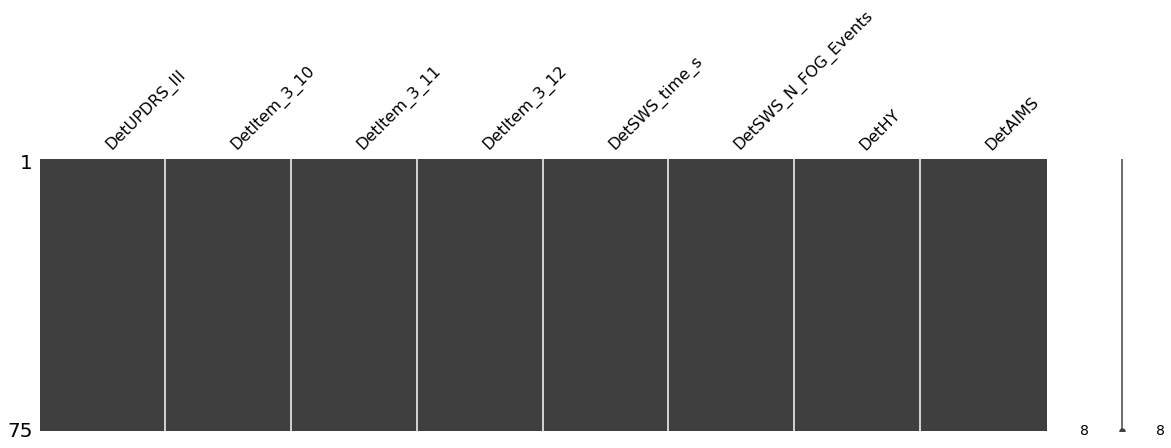

In [ ]:
mno.matrix(deter_data, figsize = (20,5))


In [ ]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS
0,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0
1,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0
2,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0
3,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0
4,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0
...,...,...,...,...,...,...,...,...
70,29.0,3.0,4.0,0.0,221.0,31.0,2.0,18.0
71,62.0,2.0,4.0,0.0,58.0,3.0,2.0,10.0
72,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0
73,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0


In [ ]:
deter_data = pd.concat([deter_data, condition_FOG_Stim_conditions], axis = 1)

In [ ]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,condition
0,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0,MED_OFF_STIM_OFF
1,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0,MED_OFF_STIM_OFF
2,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0,MED_OFF_STIM_OFF
3,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0,MED_OFF_STIM_OFF
4,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0,MED_OFF_STIM_OFF
...,...,...,...,...,...,...,...,...,...
70,29.0,3.0,4.0,0.0,221.0,31.0,2.0,18.0,MED_ON_STIM_ON_60Hz
71,62.0,2.0,4.0,0.0,58.0,3.0,2.0,10.0,MED_ON_STIM_ON_60Hz
72,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0,MED_ON_STIM_ON_60Hz
73,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0,MED_ON_STIM_ON_60Hz




---


**Check the new distributions.**

**They have not been compromised** 


---



In [ ]:
deter_data.groupby("condition").describe()["DetUPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,60.866667,9.796987,41.0,56.0,60.0,65.5,79.0
MED_OFF_STIM_ON,15.0,44.333333,7.752112,28.0,41.0,46.0,49.0,54.0
MED_ON_STIM_OFF,15.0,48.200000,10.618044,34.0,38.5,50.0,53.5,71.0
MED_ON_STIM_ON,15.0,38.000000,8.928286,21.0,34.0,41.0,45.0,48.0
MED_ON_STIM_ON_60Hz,15.0,40.600000,10.259490,21.0,35.5,39.0,46.0,62.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,2.533333,0.639940,2.0,2.0,2.0,3.0,4.0
MED_OFF_STIM_ON,15.0,2.266667,0.457738,2.0,2.0,2.0,2.5,3.0
MED_ON_STIM_OFF,15.0,2.533333,0.743223,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,15.0,2.333333,0.617213,2.0,2.0,2.0,2.5,4.0
MED_ON_STIM_ON_60Hz,15.0,2.000000,0.377964,1.0,2.0,2.0,2.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,3.333333,0.816497,2.0,3.0,4.0,4.0,4.0
MED_OFF_STIM_ON,15.0,2.266667,1.533747,0.0,1.0,2.0,4.0,4.0
MED_ON_STIM_OFF,15.0,3.066667,1.162919,1.0,2.0,4.0,4.0,4.0
MED_ON_STIM_ON,15.0,2.533333,1.125463,1.0,2.0,2.0,3.5,4.0
MED_ON_STIM_ON_60Hz,15.0,2.200000,1.373213,0.0,1.5,2.0,3.5,4.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,1.733333,1.486447,0.0,0.5,1.0,3.0,4.0
MED_OFF_STIM_ON,15.0,1.133333,1.552264,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_OFF,15.0,1.200000,1.656157,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON,15.0,1.066667,1.624221,0.0,0.0,0.0,2.5,4.0
MED_ON_STIM_ON_60Hz,15.0,0.533333,0.990430,0.0,0.0,0.0,0.5,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetSWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,216.866667,191.388485,30.0,62.0,125.0,311.000000,599.00000
MED_OFF_STIM_ON,15.0,124.400000,137.844529,19.0,39.0,52.0,168.000000,478.00000
MED_ON_STIM_OFF,15.0,130.031495,93.638981,24.0,45.5,100.0,194.090833,321.00000
MED_ON_STIM_ON,15.0,87.285143,79.887694,22.0,40.0,64.0,96.682538,332.91207
MED_ON_STIM_ON_60Hz,15.0,72.077119,55.907960,17.0,44.5,58.0,64.078394,221.00000


In [ ]:
deter_data.groupby("condition").describe()["DetSWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,16.866667,16.457159,2.0,4.0,12.000000,20.500000,55.00000
MED_OFF_STIM_ON,15.0,9.666667,12.821114,0.0,1.0,2.000000,15.500000,36.00000
MED_ON_STIM_OFF,15.0,9.661058,7.826056,1.0,2.5,6.781481,17.500000,21.00000
MED_ON_STIM_ON,15.0,4.988206,4.897338,1.0,2.0,3.000000,5.500000,15.72233
MED_ON_STIM_ON_60Hz,15.0,6.268011,8.464226,0.0,1.0,3.000000,7.510086,31.00000


In [ ]:
deter_data.groupby("condition").describe()["DetHY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,2.800000,1.014185,2.0,2.0,2.0,3.5,5.0
MED_OFF_STIM_ON,15.0,2.533333,0.833809,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_OFF,15.0,2.666667,1.112697,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON,15.0,2.466667,0.915475,2.0,2.0,2.0,2.5,5.0
MED_ON_STIM_ON_60Hz,15.0,2.133333,0.351866,2.0,2.0,2.0,2.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetAIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,15.0,4.666667,8.234654,0.0,0.0,0.0,6.0,32.0
MED_OFF_STIM_ON,15.0,3.866667,7.308182,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,15.0,9.333333,10.019030,0.0,0.0,8.0,15.0,26.0
MED_ON_STIM_ON,15.0,9.466667,12.105882,0.0,1.0,4.0,14.0,44.0
MED_ON_STIM_ON_60Hz,15.0,12.000000,13.352367,0.0,1.0,6.0,19.0,42.0




---

**First perform a Kruskal-Wallis Rank Sum Test for the variables of interest to check whether any differences are observed** 


---



In [ ]:
DetUPDRS_III_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetUPDRS_III"]
DetUPDRS_III_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetUPDRS_III"]


In [ ]:
# UPDRS III is different across groups

scipy.stats.kruskal(DetUPDRS_III_MED_OFF_STIM_OFF, 
              DetUPDRS_III_MED_OFF_STIM_ON, 
              DetUPDRS_III_MED_ON_STIM_OFF,
              DetUPDRS_III_MED_ON_STIM_ON,
              DetUPDRS_III_MED_ON_STIM_ON_60Hz)

KruskalResult(statistic=30.75914284900121, pvalue=3.4279898745611775e-06)

In [ ]:
scipy.stats.ranksums(DetUPDRS_III_MED_ON_STIM_ON, DetUPDRS_III_MED_ON_STIM_ON_60Hz)

RanksumsResult(statistic=-0.5184758473652127, pvalue=0.6041263073291684)

In [ ]:
# Walking time is not

DetSWS_time_s_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetSWS_time_s"]
DetSWS_time_s_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetSWS_time_s"]


In [ ]:
scipy.stats.ranksums(DetSWS_time_s_MED_ON_STIM_ON, DetSWS_time_s_MED_ON_STIM_ON_60Hz)

RanksumsResult(statistic=0.6636490846274722, pvalue=0.506914933812496)

In [ ]:
scipy.stats.ranksums(DetSWS_time_s_MED_OFF_STIM_ON, DetSWS_time_s_MED_OFF_STIM_OFF)

RanksumsResult(statistic=-1.638383677674072, pvalue=0.10134168189518043)

In [ ]:
# The number of FOG events is borderline

DetSWS_N_FOG_Events_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetSWS_N_FOG_Events"]


In [ ]:
scipy.stats.ranksums(DetSWS_N_FOG_Events_MED_OFF_STIM_ON, DetSWS_N_FOG_Events_MED_OFF_STIM_OFF)


RanksumsResult(statistic=-1.9287301521985911, pvalue=0.053764370975060816)



---

**Perform Kruskal-Wallis with post hoc Dunn's test and p-value adjustment for multiple comparison**

---



In [ ]:
def p_rounder(p_value):
    if p_value < .0001:
        p_value = '<.0001'
    else:
        p_value = str((round(p_value,4)))
    return p_value

def bon_correct(p_value,k):
    corrected_p = p_value * ((k *(k-1))/2)
    return p_value, corrected_p


In [ ]:
def kw_dunn_post_hoc(df,strat,comp_list, var):
    post_hoc_result_dict = {}
    N = df['rank'].count()
    n_groups = df[strat].nunique()
    for comp in comp_list:
        m1 = df.loc[df[strat] == comp[0]]['rank'].mean()
        n1 = df.loc[df[strat] == comp[0]]['rank'].count()
        m2 = df.loc[df[strat] == comp[1]]['rank'].mean()
        n2 = df.loc[df[strat] == comp[1]]['rank'].count()
        Z = (m1 - m2)/math.sqrt(((N*(N+1))/12)*((1/n1)+(1/n2)))
        Z = round(Z,4)
        p = scipy.stats.norm.sf(abs(Z))
        p, corrected_p = bon_correct(p,n_groups)
        p = p_rounder(p)
        corrected_p = p_rounder(corrected_p)
        comparison = f'{comp[0]} vs. {comp[1]}'
        post_hoc_result_dict[comparison] = [var,Z,p,corrected_p]
    return post_hoc_result_dict


In [ ]:
def kw_test(df,stratifier,var):
    import sys
    from math import sqrt
    result_list = []
    strat_list = []
    comparison_list = []
    counter = 0
    temp_df = df[[stratifier,var]].copy()
    temp_df['rank'] = temp_df[var].rank(method='average')
    for strat in df[stratifier].unique():
        result = df.loc[df[stratifier] == strat][var].values
        result_list.append(result)
        strat_list.append(strat)
    for st in strat_list:
        for st2 in strat_list:
            if st != st2 and [st2,st] not in comparison_list:
                comparison_list.append([st,st2])
    post_hoc_result_dict = kw_dunn_post_hoc(temp_df,stratifier,comparison_list,var)
    if len(result_list) == 2:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1])
    if len(result_list) == 3:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2])
    elif len(result_list) == 4:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3])
    elif len(result_list) == 5:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3],result_list[4])
    else:
        print('Stratifying levels greater than 5. Please modify code to accomodate.')
        sys.exit()
    k = round(k,4)    
    p = p_rounder(p)
    return k, p, post_hoc_result_dict

In [ ]:
k, p, post_hoc_result_dict = kw_test(deter_data,'condition','DetUPDRS_III')



---

**Check where the differences actually are**


---



In [ ]:
kw_test(deter_data,'condition','DetUPDRS_III')

(30.7591,
 '<.0001',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetUPDRS_III',
   3.4974,
   '0.0002',
   '0.0023'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetUPDRS_III',
   2.5676,
   '0.0051',
   '0.0512'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   4.976,
   '<.0001',
   '<.0001'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   4.4357,
   '<.0001',
   '<.0001'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetUPDRS_III',
   -0.9299,
   '0.1762',
   '1.7621'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   1.4786,
   '0.0696',
   '0.6962'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   0.9382,
   '0.1741',
   '1.7407'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   2.4084,
   '0.008',
   '0.0801'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   1.8681,
   '0.0309',
   '0.3087'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   -0.5403,
   '0.2945',
   '2.945']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_10')

(8.1268,
 '0.087',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_10',
   0.9717,
   '0.1656',
   '1.656'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_10',
   0.201,
   '0.4203',
   '4.2035'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_10',
   0.8796,
   '0.1895',
   '1.8954'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   2.0733,
   '0.0191',
   '0.1907'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_10',
   -0.7707,
   '0.2204',
   '2.2044'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_10',
   -0.0921,
   '0.4633',
   '4.6331'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.1016,
   '0.1353',
   '1.3532'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_10',
   0.6785,
   '0.2487',
   '2.4873'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.8723,
   '0.0306',
   '0.3058'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.1937,
   '0.1163',
   '1.163']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_11')

(8.4701,
 '0.0758',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_11',
   2.044,
   '0.0205',
   '0.2048'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_11',
   0.511,
   '0.3047',
   '3.0468'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_11',
   1.7131,
   '0.0433',
   '0.4335'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   2.2241,
   '0.0131',
   '0.1307'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_11',
   -1.533,
   '0.0626',
   '0.6264'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_11',
   -0.3309,
   '0.3704',
   '3.7036'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   0.1801,
   '0.4285',
   '4.2854'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_11',
   1.2021,
   '0.1147',
   '1.1466'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   1.7131,
   '0.0433',
   '0.4335'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   0.511,
   '0.3047',
   '3.0468']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_12')

(6.316,
 '0.1768',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_12',
   1.3026,
   '0.0964',
   '0.9636'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_12',
   1.2147,
   '0.1122',
   '1.1224'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_12',
   1.4995,
   '0.0669',
   '0.6687'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   2.2032,
   '0.0138',
   '0.1379'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_12',
   -0.088,
   '0.4649',
   '4.6494'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_12',
   0.1969,
   '0.422',
   '4.2195'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.9005,
   '0.1839',
   '1.8393'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_12',
   0.2848,
   '0.3879',
   '3.879'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.9885,
   '0.1615',
   '1.6145'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.7037,
   '0.2408',
   '2.4081']})

In [ ]:
kw_test(deter_data,'condition','DetSWS_time_s')

(8.9078,
 '0.0634',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetSWS_time_s',
   1.8471,
   '0.0324',
   '0.3237'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetSWS_time_s',
   0.8126,
   '0.2082',
   '2.0822'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   2.2534,
   '0.0121',
   '0.1212'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   2.5215,
   '0.0058',
   '0.0584'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetSWS_time_s',
   -1.0346,
   '0.1504',
   '1.5043'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   0.4063,
   '0.3423',
   '3.4226'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   0.6744,
   '0.25',
   '2.5003'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   1.4409,
   '0.0748',
   '0.7481'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   1.7089,
   '0.0437',
   '0.4373'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   0.2681,
   '0.3943',
   '3.943

In [ ]:
kw_test(deter_data,'condition','DetSWS_N_FOG_Events')

(10.8727,
 '0.028',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetSWS_N_FOG_Events',
   2.3205,
   '0.0102',
   '0.1016'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetSWS_N_FOG_Events',
   1.1602,
   '0.123',
   '1.2298'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   2.4964,
   '0.0063',
   '0.0627'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   2.7979,
   '0.0026',
   '0.0257'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetSWS_N_FOG_Events',
   -1.1602,
   '0.123',
   '1.2298'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   0.1759,
   '0.4302',
   '4.3019'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   0.4775,
   '0.3165',
   '3.165'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   1.3361,
   '0.0908',
   '0.9076'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   1.6377,
   '0.0507',
   '0.5074'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz'

In [ ]:
kw_test(deter_data,'condition','DetHY')

(4.6089,
 '0.3298',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetHY', 0.6576, '0.2554', '2.554'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetHY',
   0.5571,
   '0.2887',
   '2.8873'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetHY', 0.9508, '0.1709', '1.7085'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.688,
   '0.0457',
   '0.4571'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetHY', -0.1005, '0.46', '4.5997'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetHY', 0.2932, '0.3847', '3.8468'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.0304,
   '0.1514',
   '1.5141'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetHY', 0.3937, '0.3469', '3.469'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.1309,
   '0.129',
   '1.2905'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   0.7372,
   '0.2305',
   '2.305']})

In [ ]:
kw_test(deter_data,'condition','DetAIMS')

(7.4439,
 '0.1142',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetAIMS',
   0.3644,
   '0.3578',
   '3.5778'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetAIMS',
   -1.378,
   '0.0841',
   '0.841'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetAIMS',
   -1.3068,
   '0.0956',
   '0.9564'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -1.7424,
   '0.0407',
   '0.4072'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetAIMS',
   -1.7424,
   '0.0407',
   '0.4072'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetAIMS',
   -1.6712,
   '0.0473',
   '0.4734'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -2.1068,
   '0.0176',
   '0.1757'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetAIMS',
   0.0712,
   '0.4716',
   '4.7162'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -0.3644,
   '0.3578',
   '3.5778'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -0.4356,
   '0.3316',
   '3.3156']})



---

**Plot data across groups**


---



In [ ]:
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

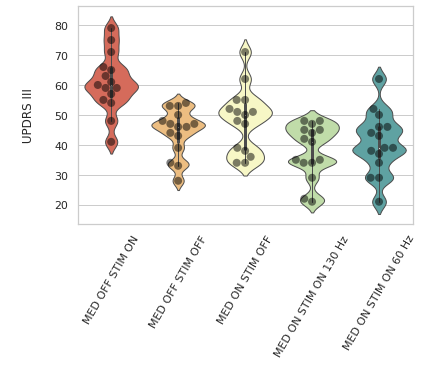

In [ ]:

ax = sns.violinplot(x="condition", y="DetUPDRS_III", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetUPDRS_III", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])


In [ ]:
# Plot data
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

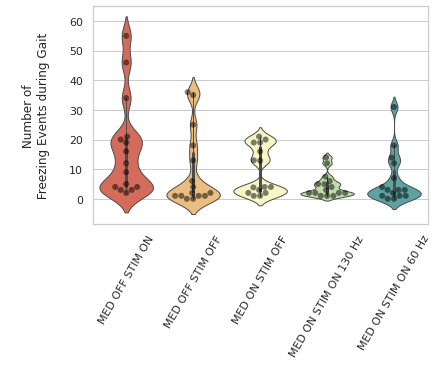

In [ ]:
ax = sns.violinplot(x="condition", y="DetSWS_N_FOG_Events", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_N_FOG_Events", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Number of \n Freezing Events during Gait \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

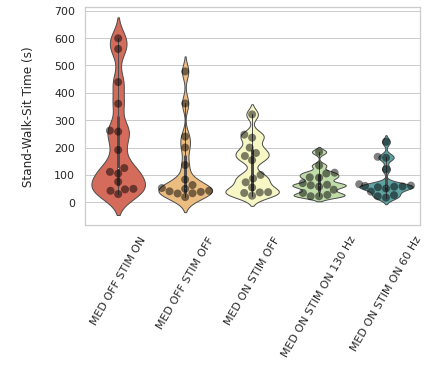

In [ ]:
ax = sns.violinplot(x="condition", y="DetSWS_time_s", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_time_s", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Stand-Walk-Sit Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM ON', 'MED OFF STIM OFF', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

In [ ]:
deter_data = pd.concat([patid_FOG_Stim_conditions, deter_data], axis = 1)

In [ ]:
DetUPDRS_III_OFF = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_OFF_STIM_OFF"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_OFF"}).reset_index(drop=True)

DetUPDRS_III_60Hz = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetUPDRS_III_OFF.join(DetUPDRS_III_60Hz)

OFF_to60Hz = DetUPDRS_III_OFF.join(DetUPDRS_III_60Hz)

OFF_to60Hz["Difference"] =   OFF_to60Hz["DetUPDRS_III_60Hz"] / OFF_to60Hz["DetUPDRS_III_OFF"]

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetUPDRS_III_OFF,DetUPDRS_III_60Hz,Difference
0,55.0,50.0,0.909091
5,59.0,52.0,0.881356
11,71.0,62.0,0.873239
14,48.0,39.0,0.812500
4,59.0,46.0,0.779661
10,41.0,29.0,0.707317
9,54.0,38.0,0.703704
12,66.0,44.0,0.666667
3,75.0,46.0,0.613333
6,61.0,37.0,0.606557


In [ ]:
DetSWS_N_FOG_Events_OFF = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_OFF_STIM_OFF"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_OFF"}).reset_index(drop=True)

DetSWS_N_FOG_Events_60Hz = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetSWS_N_FOG_Events_OFF.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz = DetSWS_N_FOG_Events_OFF.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz["Difference"] =   ((OFF_to60Hz["DetSWS_N_FOG_Events_OFF"] - OFF_to60Hz["DetSWS_N_FOG_Events_60Hz"]) / OFF_to60Hz["DetSWS_N_FOG_Events_OFF"])*100

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_N_FOG_Events_OFF,DetSWS_N_FOG_Events_60Hz,Difference
2,34.0,0.000000,100.000000
9,9.0,0.000000,100.000000
3,19.0,1.000000,94.736842
6,55.0,7.000000,87.272727
7,20.0,3.000000,85.000000
14,5.0,1.000000,80.000000
1,4.0,1.000000,75.000000
8,46.0,13.894941,69.793606
13,12.0,4.000000,66.666667
5,4.0,2.000000,50.000000


In [ ]:
DetSWS_N_FOG_Events_ON = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_ON"}).reset_index(drop=True)

DetSWS_N_FOG_Events_60Hz = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetSWS_N_FOG_Events_ON.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz = DetSWS_N_FOG_Events_ON.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz["Difference"] =  ((OFF_to60Hz["DetSWS_N_FOG_Events_ON"] - OFF_to60Hz["DetSWS_N_FOG_Events_60Hz"]) / OFF_to60Hz["DetSWS_N_FOG_Events_ON"])*100

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_N_FOG_Events_ON,DetSWS_N_FOG_Events_60Hz,Difference
2,4.0,0.000000,100.000000
9,2.0,0.000000,100.000000
7,18.0,3.000000,83.333333
6,25.0,7.000000,72.000000
13,13.0,4.000000,69.230769
12,35.0,12.000000,65.714286
8,36.0,13.894941,61.402941
3,2.0,1.000000,50.000000
14,1.0,1.000000,0.000000
5,1.0,2.000000,-100.000000


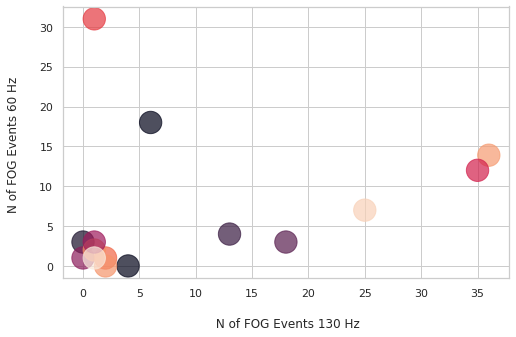

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = np.random.rand(15)
area = (30 * np.random.rand(15))**2

ax.scatter(x = OFF_to60Hz['DetSWS_N_FOG_Events_ON'], y = OFF_to60Hz['DetSWS_N_FOG_Events_60Hz'], s = 500, alpha=0.7, c=colors)
plt.xlabel("\n N of FOG Events 130 Hz")
plt.ylabel("N of FOG Events 60 Hz \n")

plt.show()